In [22]:
dict1 = {'a': 1, 'b': 2, 'c': 3}
dict2 = {'a': 100, 'b': 200, 'f':800}

z = dict((k, [v] + ([dict2[k]] if k in dict2 else [])) for (k, v) in dict1.items())
z

{'a': [1, 100], 'b': [2, 200], 'c': [3]}

In [23]:
###microseconds
#contruct dictionary

import string
import numpy as np
import itertools
keysdata = list(string.ascii_lowercase)

N = 10

def method1():
    d1 = dict([(keysdata[i],np.random.randint(30)) for i in np.random.randint(len(keysdata), size=N)])
    #d1 
    d2 = dict([(keysdata[i],np.random.randint(30)) for i in np.random.randint(len(keysdata), size=N)])
    #d2 
    z = dict((k, [v] + ([d2[k]] if k in d2 else [])) for (k, v) in d1.items())
    return(z)


def method2():
    d1 = dict([(keysdata[i],np.random.randint(30)) for i in np.random.randint(len(keysdata), size=N)])
    #d1 
    d2 = dict([(keysdata[i],np.random.randint(30)) for i in np.random.randint(len(keysdata), size=N)])
    #d2 
    z = {}
    for k,v in itertools.chain(d1.items(), d2.items()):
        if(z.get(k)):
            z[k].append(v)
        else:
            z[k] = [v]
    return(z)



In [24]:
from datetime import datetime
import time
import

COUNTS = 100000

def expt1():
    ts = []
    for i in range(0,COUNTS):
        tstart = datetime.now()
        z = method1()
        tend = datetime.now()
        c = tend-tstart
        ts.append(c.seconds * 1000000 + c.microseconds)
    return(ts)


def expt2():
    ts = []
    for i in range(0,COUNTS):
        tstart = datetime.now()
        z = method2()
        tend = datetime.now()
        c = tend-tstart
        ts.append(c.seconds * 1000000 + c.microseconds)
    return(ts)

SyntaxError: invalid syntax (<ipython-input-24-9b30a574f98c>, line 3)

In [25]:
np.random.seed(100)
t1s = expt1()
np.random.seed(100)
t2s = expt2()

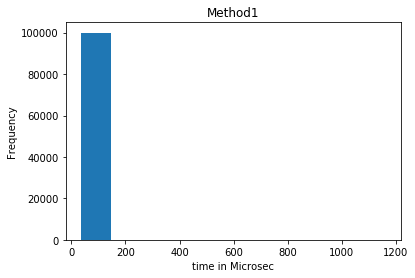

In [26]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

%matplotlib inline  

plt.hist(t1s)
plt.title("Method1")
plt.xlabel("time in Microsec")
plt.ylabel("Frequency")

fig = plt.gcf()

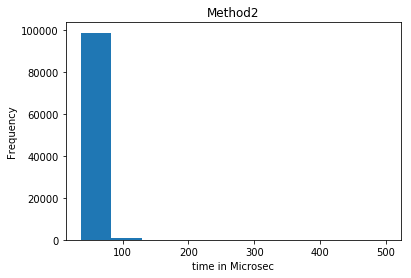

In [27]:
plt.hist(t2s)
plt.title("Method2")
plt.xlabel("time in Microsec")
plt.ylabel("Frequency")

fig = plt.gcf()

In [28]:
import scipy as sc
import scipy.stats
sc.stats.describe(t1s)

DescribeResult(nobs=100000, minmax=(36, 1161), mean=40.841450000000002, variance=84.591517812678092, skewness=23.481169640334734, kurtosis=2265.783005622322)

In [29]:
sc.stats.describe(t2s)

DescribeResult(nobs=100000, minmax=(37, 499), mean=42.088290000000001, variance=88.542440300302999, skewness=6.650646016490658, kurtosis=98.92969918145094)

In [36]:
dict1 = {'a': 1, 'b': 2, 'c': 3}
dict2 = {'a': 100, 'b': 200, 'f':800}

In [41]:
import pandas as pd
df = pd.DataFrame.from_records(list(itertools.chain(dict1.items(), dict2.items())))
df

,0,1
0,a,1
1,b,2
2,c,3
3,a,100
4,b,200
5,f,800


In [45]:
df.groupby(0)[1].apply(list).to_dict()

{'a': [1, 100], 'b': [2, 200], 'c': [3], 'f': [800]}

In [46]:
pd.DataFrame.from_records(list(itertools.chain(dict1.items(), dict2.items()))).groupby(0)[1].apply(list).to_dict()

{'a': [1, 100], 'b': [2, 200], 'c': [3], 'f': [800]}